In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc

In [2]:
canada_path = "canada_project/data/canada_data.csv"
canada_data = pd.read_csv(canada_path)
#canada_data

In [3]:
#canada count test chunk (does not reflect all revisions)
#canada_rev3.count()

In [4]:
#drop blank columns
canada_rev1 = canada_data.drop(["SYMBOL", "TERMINATED"], axis=1)
#drop "duplicate" or not useful info
canada_rev2 = canada_rev1.drop(["DGUID", "SCALAR_ID", "UOM_ID", "REF_DATE", "DECIMALS"], axis=1) #STATUS column's purpose unknown at this point
#setting COORDINATE to index
canada_rev3 = canada_rev2.set_index("COORDINATE")
#extra for viewing
canada_rev4 = canada_rev3.copy()

In [5]:
#fill missing values in VALUE and STATUS (while STATUS still exists)
canada_rev4["VALUE"] = canada_rev4["VALUE"].fillna("N/A")
#canada_rev4["STATUS"] = canada_rev4["STATUS"].fillna("N/A") #this one looks stupid on further examination

In [6]:
#making csv to view in excel
canada_rev3.to_csv("canada_project/data/canada_rev3.csv", index=True, header=True)
canada_rev4.to_csv("canada_project/data/canada_rev4.csv", index=True, header=True)

In [7]:
#sort into two different dfs: one for percents values and one for raw numbers
canada_percent = canada_rev3[canada_rev3["UOM"] != "Persons"]
canada_persons = canada_rev3[canada_rev3["UOM"] != "Percent"]

In [8]:
#something to play around with; I think it may be useful in early parts of the report; feel free to delete which would be less useful
canada_persons_total = canada_persons[canada_persons["Response"] == "Total, job satisfaction"]
canada_percent_total = canada_percent[canada_percent["Response"] == "Total, job satisfaction"]
canada_persons_total

,GEO,Age group,Sex,Response,Estimates,UOM,SCALAR_FACTOR,VECTOR,VALUE,STATUS
COORDINATE,,,,,,,,,,
1.1.1.1.1,Canada,"Total, 15 years and over",Both sexes,"Total, job satisfaction",Number of persons,Persons,thousands,v116319003,15167.0,NaN
1.1.2.1.1,Canada,"Total, 15 years and over",Male,"Total, job satisfaction",Number of persons,Persons,thousands,v116319031,7889.0,NaN
1.1.3.1.1,Canada,"Total, 15 years and over",Female,"Total, job satisfaction",Number of persons,Persons,thousands,v116319059,7278.0,NaN
1.2.1.1.1,Canada,15 to 24 years,Both sexes,"Total, job satisfaction",Number of persons,Persons,thousands,v116319087,2000.0,NaN
1.2.2.1.1,Canada,15 to 24 years,Male,"Total, job satisfaction",Number of persons,Persons,thousands,v116319115,982.0,NaN
...,...,...,...,...,...,...,...,...,...,...
6.9.2.1.1,British Columbia,65 to 74 years,Male,"Total, job satisfaction",Number of persons,Persons,thousands,v116759169,24.0,E
6.9.3.1.1,British Columbia,65 to 74 years,Female,"Total, job satisfaction",Number of persons,Persons,thousands,v116759205,26.0,E
6.10.1.1.1,British Columbia,75 years and over,Both sexes,"Total, job satisfaction",Number of persons,Persons,thousands,v116759241,NaN,F


In [9]:
#garrett portion
provinces = canada_rev3[(canada_rev3["GEO"] != "Canada") & (canada_rev3["GEO"] != "Atlantic provinces") & 
                        (canada_rev3["GEO"] != "Prairie provinces")]
#one graphic should be the population distribution of responses; I have an idea but its late so I shouldn't go further 

In [10]:
#canada_persons_no_f = canada_percent = canada_rev3[canada_rev3["STATUS"] != "F"]
#canada_persons_no_f["GEO"].value_counts()
#this is just extra stuff

In [11]:
#setting up for question 4 i guess
provinces_percent = provinces[provinces["Estimates"] == "Percentage of persons"]
pro_per_2 = provinces_percent[(provinces_percent["Sex"] == "Both sexes") & 
                              (provinces_percent["Response"] != "Total, job satisfaction") &
                             (provinces_percent["Age group"] == "Total, 15 years and over")]
pro_per_3 = pro_per_2[(pro_per_2["Response"] == "Very satisfied or satisfied") | 
                      (pro_per_2["Response"] == "Neither satisfied nor dissatisfied") |
                     (pro_per_2["Response"] == "Dissatisfied or very dissatisfied")]
#setting up for question 4 i guess (but persons)
provinces_people = provinces[provinces["Estimates"] == "Number of persons"]
pro_ple_2 = provinces_people[(provinces_people["Sex"] == "Both sexes") & 
                              (provinces_people["Response"] != "Total, job satisfaction") &
                             (provinces_people["Age group"] == "Total, 15 years and over")]
pro_ple_3 = pro_ple_2[(pro_ple_2["Response"] == "Very satisfied or satisfied") | 
                      (pro_ple_2["Response"] == "Neither satisfied nor dissatisfied") |
                     (pro_ple_2["Response"] == "Dissatisfied or very dissatisfied")]
#omitted the "don't know" rows as there are a significant portion with no value" 
pro_per_3["VALUE"] = pro_per_3["VALUE"].fillna(0)
#pro_per_3
#omitted the "don't know" rows as there are a significant portion with no value (but persons)
pro_ple_3["VALUE"] = pro_ple_3["VALUE"].fillna(0)
#pro_ple_3

C:\Users\epicr\AppData\Local\Temp\ipykernel_12520\852431041.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pro_per_3["VALUE"] = pro_per_3["VALUE"].fillna(0)
C:\Users\epicr\AppData\Local\Temp\ipykernel_12520\852431041.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pro_ple_3["VALUE"] = pro_ple_3["VALUE"].fillna(0)


In [12]:
#again, just to get a separate viewing window
pro_per_3.to_csv("canada_project/data/province_percent.csv", index=True, header=True)
pro_ple_3.to_csv("canada_project/data/province_people.csv", index=True, header=True)

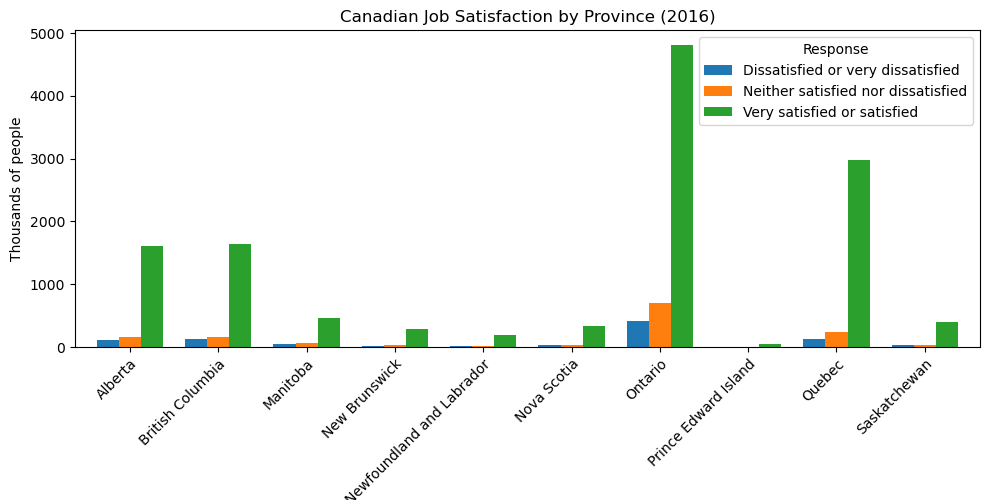

In [13]:
#plot involving the raw numbers
pro_ple_plot1 = pro_ple_3.pivot(index="GEO", columns="Response", 
                                values="VALUE").plot(kind="bar", figsize=(10,5),
                                title="Canadian Job Satisfaction by Province (2016)",
                                xlabel="Province", ylabel="Thousands of people", width=0.75)
plt.xticks(rotation=45, wrap=True, ha="right")

plt.tight_layout()
plt.savefig("canada_project/results/province_bar.png")
plt.show()

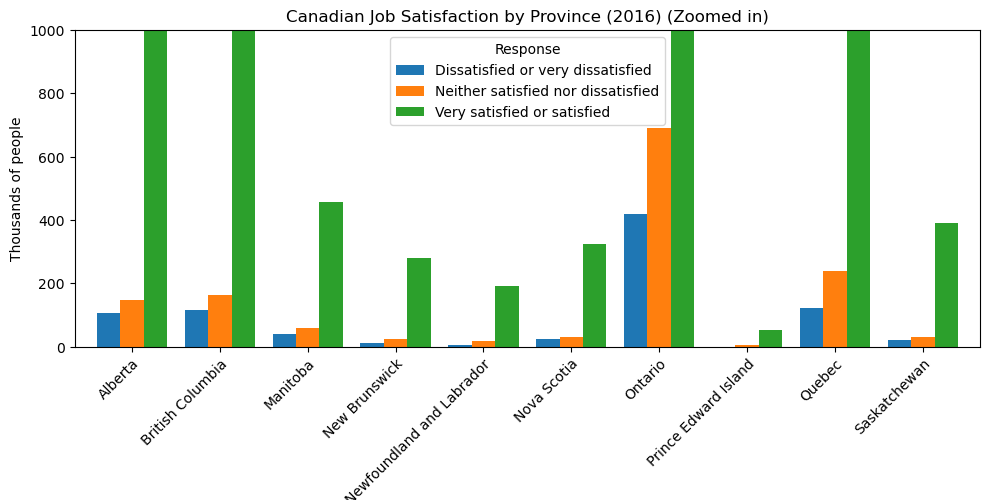

In [14]:
#above plot but zoomed in because of the sheer difference in values
pro_ple_plot2 = pro_ple_3.pivot(index="GEO", columns="Response", 
                                values="VALUE").plot(kind="bar", figsize=(10,5),
                                title="Canadian Job Satisfaction by Province (2016) (Zoomed in)",xlabel="Province", 
                                ylabel="Thousands of people", width=0.8, ylim=[0,1000])
plt.xticks(rotation=45, wrap=True, ha="right")

plt.tight_layout()
plt.savefig("canada_project/results/province_bar_zoom.png")
plt.show()

In [15]:
#these two are show per the presentation as a means of showing how much data has been collected,
#and how, by province, some may be gravely overshadowed in numbers, hence the importance of the
#addition of percents in the VALUE column

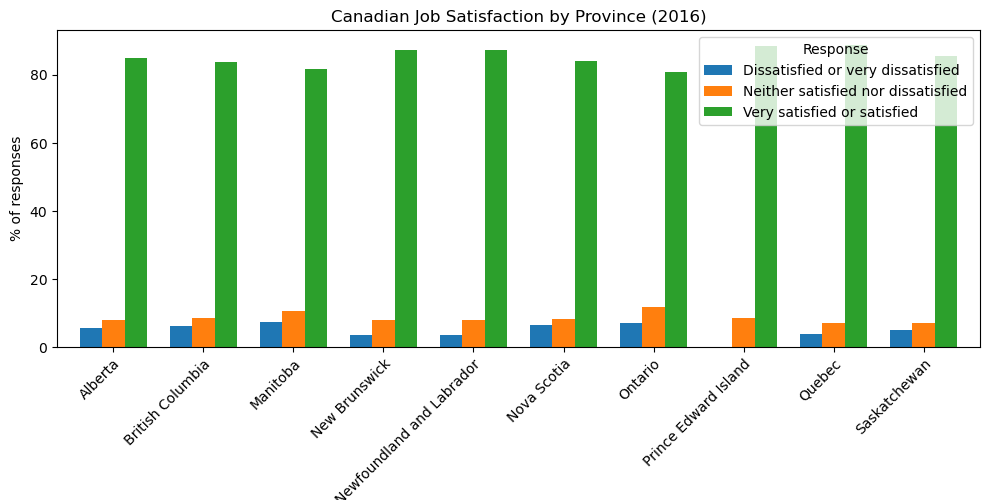

In [16]:
#a better representation of the data: the percent values
pro_per_plot = pro_per_3.pivot(index="GEO", columns="Response", 
                               values="VALUE").plot(kind="bar", figsize=(10,5),
                               title="Canadian Job Satisfaction by Province (2016)",
                               xlabel="Province", ylabel="% of responses", width=0.75)
plt.xticks(rotation=45, wrap=True, ha="right")

plt.tight_layout()
plt.savefig("canada_project/results/province_bar_percent.png")
plt.show()

In [17]:
#some statistical spitballing
anova_thing = provinces_percent.groupby(["GEO", "Response", "VALUE"], group_keys=False).apply(lambda x: x.sample(1))

group0 = (anova_thing[anova_thing["GEO"] == "Alberta"]["VALUE"])
group1 = (anova_thing[anova_thing["GEO"] == "British Columbia"]["VALUE"])
group2 = (anova_thing[anova_thing["GEO"] == "Manitoba"]["VALUE"])
group3 = (anova_thing[anova_thing["GEO"] == "New Brunswick"]["VALUE"])
group4 = (anova_thing[anova_thing["GEO"] == "Newfoundland and Labrador"]["VALUE"])
group5 = (anova_thing[anova_thing["GEO"] == "Nova Scotia"]["VALUE"])
group6 = (anova_thing[anova_thing["GEO"] == "Ontario"]["VALUE"])
group7 = (anova_thing[anova_thing["GEO"] == "Prince Edward Island"]["VALUE"])
group8 = (anova_thing[anova_thing["GEO"] == "Quebec"]["VALUE"])
group9 = (anova_thing[anova_thing["GEO"] == "Saskatchewan"]["VALUE"])

In [18]:
#check for normality
model1 = ols("VALUE ~ C(GEO)", data=anova_thing).fit()
st.shapiro(model1.resid)

ShapiroResult(statistic=0.9533145427703857, pvalue=6.128244409869289e-15)

In [19]:
#check for homogeneity of variance
st.levene(group0, group1, group2, group3, group4, group5, group6, group7, group8, group9)

LeveneResult(statistic=0.8239232998527855, pvalue=0.5941724617174591)

In [20]:
#the actual anova test
st.f_oneway(group0, group1, group2, group3, group4, group5, group6, group7, group8, group9)

F_onewayResult(statistic=3.6157150721924274, pvalue=0.00019817070355378322)

In [21]:
#repeat from above but with a more narrow responce
group0_1 = anova_thing["VALUE"][anova_thing["GEO"] == "Alberta"][anova_thing["Response"] == "Very satisfied or satisfied"]
group1_1 = anova_thing["VALUE"][anova_thing["GEO"] == "British Columbia"][anova_thing["Response"] == "Very satisfied or satisfied"]
group2_1 = anova_thing["VALUE"][anova_thing["GEO"] == "Manitoba"][anova_thing["Response"] == "Very satisfied or satisfied"]
group3_1 = anova_thing["VALUE"][anova_thing["GEO"] == "New Brunswick"][anova_thing["Response"] == "Very satisfied or satisfied"]
group4_1 = anova_thing["VALUE"][anova_thing["GEO"] == "Newfoundland and Labrador"][anova_thing["Response"] == "Very satisfied or satisfied"]
group5_1 = anova_thing["VALUE"][anova_thing["GEO"] == "Nova Scotia"][anova_thing["Response"] == "Very satisfied or satisfied"]
group6_1 = anova_thing["VALUE"][anova_thing["GEO"] == "Ontario"][anova_thing["Response"] == "Very satisfied or satisfied"]
group7_1 = anova_thing["VALUE"][anova_thing["GEO"] == "Prince Edward Island"][anova_thing["Response"] == "Very satisfied or satisfied"]
group8_1 = anova_thing["VALUE"][anova_thing["GEO"] == "Quebec"][anova_thing["Response"] == "Very satisfied or satisfied"]
group9_1 = anova_thing["VALUE"][anova_thing["GEO"] == "Saskatchewan"][anova_thing["Response"] == "Very satisfied or satisfied"]

In [22]:
model2 = ols("VALUE ~ C(GEO) + C(Response)", data=anova_thing).fit()
st.shapiro(model2.resid)

ShapiroResult(statistic=0.9692314863204956, pvalue=1.102040333988974e-11)

In [23]:
st.levene(group0_1, group1_1, group2_1, group3_1, group4_1, group5_1, group6_1, group7_1, group8_1, group9_1)

LeveneResult(statistic=0.5561688935008176, pvalue=0.8318610309750597)

In [24]:
st.f_oneway(group0_1, group1_1, group2_1, group3_1, group4_1, group5_1, group6_1, group7_1, group8_1, group9_1)

F_onewayResult(statistic=4.066719831000484, pvalue=7.728070676246595e-05)

In [25]:
comp = mc.MultiComparison(anova_thing["VALUE"], anova_thing["GEO"])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Alberta,British Columbia,-1.8401,1.0,-15.7629,12.0828,False
Alberta,Manitoba,0.6056,1.0,-14.1732,15.3844,False
Alberta,New Brunswick,6.7981,0.9283,-8.6477,22.244,False
Alberta,Newfoundland and Labrador,7.5274,0.8578,-7.5922,22.647,False
Alberta,Nova Scotia,3.6553,0.999,-11.4643,18.7749,False
Alberta,Ontario,-8.6099,0.5492,-21.8066,4.5867,False
Alberta,Prince Edward Island,16.0477,0.1259,-1.8977,33.9931,False
Alberta,Quebec,-0.3538,1.0,-14.3838,13.6763,False
Alberta,Saskatchewan,5.143,0.9847,-9.6892,19.9753,False
British Columbia,Manitoba,2.4457,0.9999,-11.9198,16.8111,False


In [27]:
#tracy portion
canada_persons.columns

Index(['GEO', 'Age group', 'Sex', 'Response', 'Estimates', 'UOM',
       'SCALAR_FACTOR', 'VECTOR', 'VALUE', 'STATUS'],
      dtype='object')

In [28]:
# start gender compare & limit to male & female
gen_sat = canada_persons[['GEO', 'Age group', 'Sex', 'Response', 'Estimates', 'VALUE']]
gend_sat = gen_sat.loc[gen_sat["Sex"] != "Both sexes"]
#gend_sat.head()

In [29]:
#limit response selections
gend2_sat = gend_sat.loc[(gend_sat["Response"] =="Very satisfied or satisfied") |
                         (gend_sat["Response"] =="Neither satisfied nor dissatisfied") |
                         (gend_sat["Response"] =="Dissatisfied or very dissatisfied") |
                         (gend_sat["Response"] =="Don't know/refusal/not stated")]
#gend2_sat.head()

In [30]:
# limit to only total group/age
gender_sat = gend2_sat.loc[(gend2_sat["Age group"] == "Total, 15 years and over")]
#gender_sat.head()

In [31]:
#Focus only Canada, all ages
gen_canada = gender_sat.loc[(gen_sat["GEO"] == "Canada")]

gen_canada.head(10)
gen_canada_male = gen_canada.loc[(gen_sat["Sex"] == "Male")]
gen_canada_female = gen_canada.loc[(gen_sat["Sex"] == "Female")]

# Filter the DataFrame down only to those columns to chart
resp_gen_male = gen_canada_male[["Response","VALUE"]]
resp_gen_female = gen_canada_female[["Response","VALUE"]]


# Set index 
resp_gen_male = resp_gen_male.set_index("Response")
resp_gen_female = resp_gen_female.set_index("Response")
#resp_gen_male.head()

gen_canada.head(10)

,GEO,Age group,Sex,Response,Estimates,VALUE
COORDINATE,,,,,,
1.1.2.8.1,Canada,"Total, 15 years and over",Male,Very satisfied or satisfied,Number of persons,6530.0
1.1.2.4.1,Canada,"Total, 15 years and over",Male,Neither satisfied nor dissatisfied,Number of persons,805.0
1.1.2.9.1,Canada,"Total, 15 years and over",Male,Dissatisfied or very dissatisfied,Number of persons,484.0
1.1.2.7.1,Canada,"Total, 15 years and over",Male,Don't know/refusal/not stated,Number of persons,70.0
1.1.3.8.1,Canada,"Total, 15 years and over",Female,Very satisfied or satisfied,Number of persons,6201.0
1.1.3.4.1,Canada,"Total, 15 years and over",Female,Neither satisfied nor dissatisfied,Number of persons,605.0
1.1.3.9.1,Canada,"Total, 15 years and over",Female,Dissatisfied or very dissatisfied,Number of persons,388.0
1.1.3.7.1,Canada,"Total, 15 years and over",Female,Don't know/refusal/not stated,Number of persons,84.0


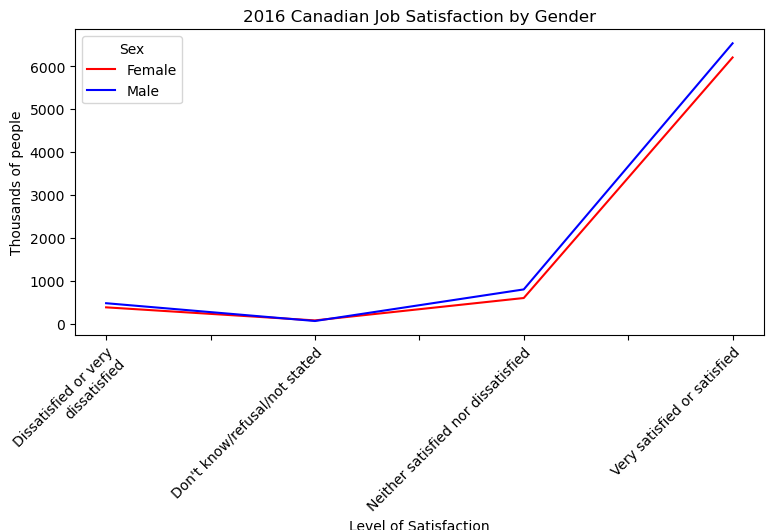

In [33]:
# line chart comparing job satisfaction responses from male vs female

get_canada = gen_canada.pivot(index="Response", columns="Sex", values="VALUE").plot(color=("red", "blue"), figsize=(8,5),
                                                                                    title="2016 Canadian Job Satisfaction by Gender", 
                                                                                    xlabel="Level of Satisfaction", 
                                                                                    ylabel="Thousands of people")

plt.xticks(rotation=45, wrap=True, ha="right")
plt.tight_layout()

plt.savefig("canada_project/results/gender_peeps_line.png")
plt.show()

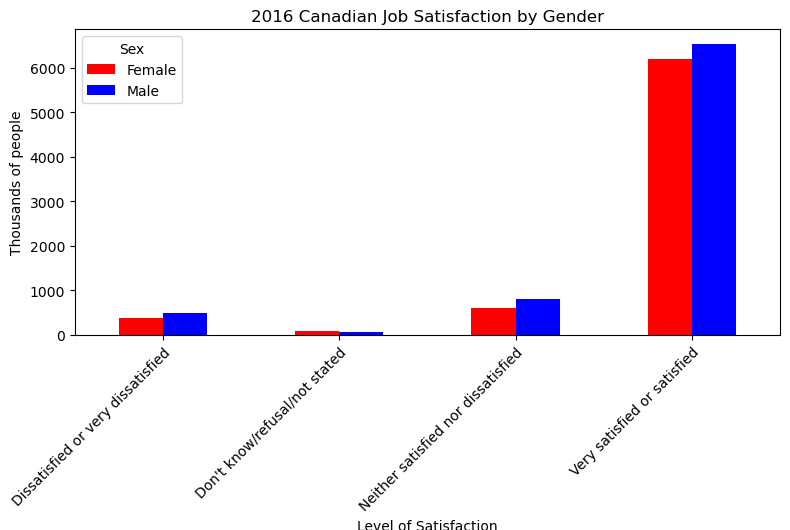

In [34]:
# bar chart comparing job satisfaction responses from male vs female

get_canada_bar = gen_canada.pivot(index="Response", columns="Sex", values="VALUE").plot(kind="bar", color=("red", "blue"), figsize=(8,5),
                                                                                    title="2016 Canadian Job Satisfaction by Gender", 
                                                                                    xlabel="Level of Satisfaction", 
                                                                                    ylabel="Thousands of people")

plt.xticks(rotation=45, wrap=True, ha="right")
plt.tight_layout()

plt.savefig("canada_project/results/gender_peeps_bar.png")
plt.show()

In [35]:
gen_sat_per = canada_percent[['GEO', 'Age group', 'Sex', 'Response', 'Estimates', 'VALUE']]
gen_sat_per.head()

,GEO,Age group,Sex,Response,Estimates,VALUE
COORDINATE,,,,,,
1.1.1.1.2,Canada,"Total, 15 years and over",Both sexes,"Total, job satisfaction",Percentage of persons,100.0
1.1.1.1.3,Canada,"Total, 15 years and over",Both sexes,"Total, job satisfaction","Low 95% confidence interval, percent",100.0
1.1.1.1.4,Canada,"Total, 15 years and over",Both sexes,"Total, job satisfaction","High 95% confidence interval, percent",100.0
1.1.1.8.2,Canada,"Total, 15 years and over",Both sexes,Very satisfied or satisfied,Percentage of persons,83.9
1.1.1.8.3,Canada,"Total, 15 years and over",Both sexes,Very satisfied or satisfied,"Low 95% confidence interval, percent",82.8


In [36]:
# focus on all of Canada,and total age group
gen_perc = gen_sat_per[(gen_sat_per["GEO"] == "Canada") &
                        (gen_sat_per["Age group"] == "Total, 15 years and over")]

# limit response selections
gen_perc_resp = gen_perc[(gen_perc["Response"] =="Very satisfied or satisfied") |
                         (gen_perc["Response"] =="Neither satisfied nor dissatisfied") |
                         (gen_perc["Response"] =="Dissatisfied or very dissatisfied") |
                         (gen_perc["Response"] =="Don't know/refusal/not stated")]

# limit to only percentage of persons and male/female
gen_perc_only = gen_perc_resp[(gen_perc_resp["Estimates"] == "Percentage of persons")]
gen_percent = gen_perc_only[(gen_perc_only["Sex"] != "Both sexes")]

gen_percent

,GEO,Age group,Sex,Response,Estimates,VALUE
COORDINATE,,,,,,
1.1.2.8.2,Canada,"Total, 15 years and over",Male,Very satisfied or satisfied,Percentage of persons,82.8
1.1.2.4.2,Canada,"Total, 15 years and over",Male,Neither satisfied nor dissatisfied,Percentage of persons,10.2
1.1.2.9.2,Canada,"Total, 15 years and over",Male,Dissatisfied or very dissatisfied,Percentage of persons,6.1
1.1.2.7.2,Canada,"Total, 15 years and over",Male,Don't know/refusal/not stated,Percentage of persons,0.9
1.1.3.8.2,Canada,"Total, 15 years and over",Female,Very satisfied or satisfied,Percentage of persons,85.2
1.1.3.4.2,Canada,"Total, 15 years and over",Female,Neither satisfied nor dissatisfied,Percentage of persons,8.3
1.1.3.9.2,Canada,"Total, 15 years and over",Female,Dissatisfied or very dissatisfied,Percentage of persons,5.3
1.1.3.7.2,Canada,"Total, 15 years and over",Female,Don't know/refusal/not stated,Percentage of persons,1.2


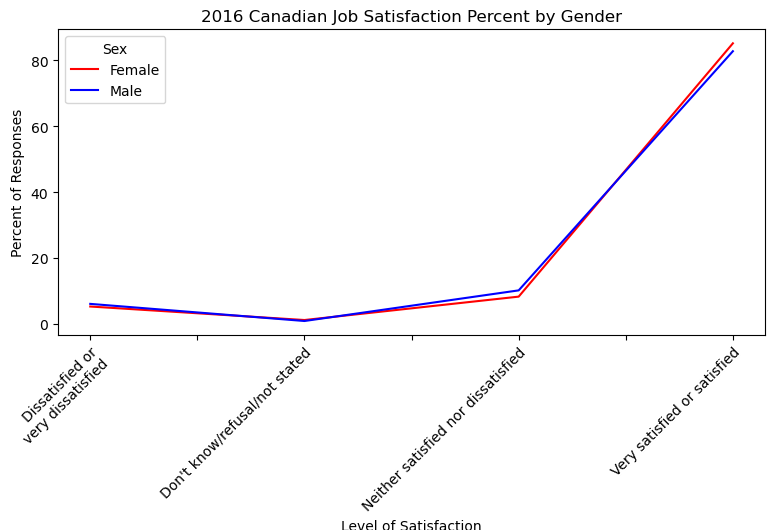

In [37]:
get_percent = gen_percent.pivot(index="Response", columns="Sex", values="VALUE").plot(color=("red", "blue"), figsize=(8,5),
                                                                                    title="2016 Canadian Job Satisfaction Percent by Gender", 
                                                                                    xlabel="Level of Satisfaction", 
                                                                                    ylabel="Percent of Responses")

plt.xticks(rotation=45, wrap=True, ha="right")
plt.tight_layout()

plt.savefig("canada_project/results/gender_percent_line.png")
plt.show()

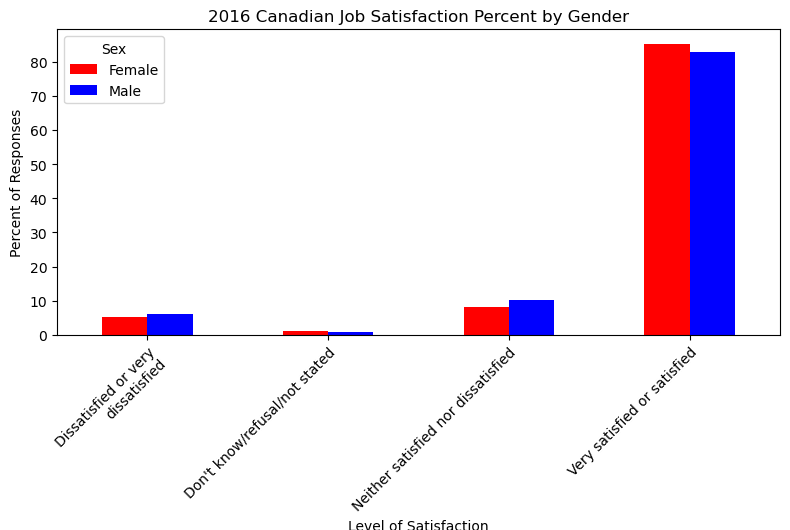

In [39]:
get_percent_bar = gen_percent.pivot(index="Response", columns="Sex", values="VALUE").plot(kind="bar", color=("red", "blue"), figsize=(8,5),
                                                                                    title="2016 Canadian Job Satisfaction Percent by Gender", 
                                                                                    xlabel="Level of Satisfaction", 
                                                                                    ylabel="Percent of Responses")

plt.xticks(rotation=45, wrap=True, ha="right")
plt.tight_layout()

plt.savefig("canada_project/results/gender_percent_bar.png")
plt.show()

In [40]:
#hannah section
#AGE GROUPS
canada_rev3

,GEO,Age group,Sex,Response,Estimates,UOM,SCALAR_FACTOR,VECTOR,VALUE,STATUS
COORDINATE,,,,,,,,,,
1.1.1.1.1,Canada,"Total, 15 years and over",Both sexes,"Total, job satisfaction",Number of persons,Persons,thousands,v116319003,15167.0,NaN
1.1.1.1.2,Canada,"Total, 15 years and over",Both sexes,"Total, job satisfaction",Percentage of persons,Percent,units,v116319004,100.0,NaN
1.1.1.1.3,Canada,"Total, 15 years and over",Both sexes,"Total, job satisfaction","Low 95% confidence interval, percent",Percent,units,v116319005,100.0,NaN
1.1.1.1.4,Canada,"Total, 15 years and over",Both sexes,"Total, job satisfaction","High 95% confidence interval, percent",Percent,units,v116319006,100.0,NaN
1.1.1.8.1,Canada,"Total, 15 years and over",Both sexes,Very satisfied or satisfied,Number of persons,Persons,thousands,v116747325,12730.0,NaN
...,...,...,...,...,...,...,...,...,...,...
6.10.3.6.4,British Columbia,75 years and over,Female,Very dissatisfied,"High 95% confidence interval, percent",Percent,units,v116759344,NaN,F
6.10.3.7.1,British Columbia,75 years and over,Female,Don't know/refusal/not stated,Number of persons,Persons,thousands,v116759345,NaN,F
6.10.3.7.2,British Columbia,75 years and over,Female,Don't know/refusal/not stated,Percentage of persons,Percent,units,v116759346,NaN,F


In [42]:
Canada_GEO = canada_rev3[canada_rev3["GEO"] == "Canada"]

In [43]:
Agegroup_percent = Canada_GEO[Canada_GEO["Estimates"] == "Percentage of persons"]

age_per_2 = Agegroup_percent[(Agegroup_percent["Sex"] == "Both sexes") & 
                              (Agegroup_percent["Response"] != "Total, job satisfaction") &
                             (Agegroup_percent["Age group"] == "Total, 15 years and over")]
age_per_3 = age_per_2[(age_per_2["Response"] == "Very satisfied or satisfied") | 
                      (age_per_2["Response"] == "Neither satisfied nor dissatisfied") |
                     (age_per_2["Response"] == "Dissatisfied or very dissatisfied")]
#setting up for question 4 i guess (but persons)
#provinces_people = provinces[provinces["Estimates"] == "Number of persons"]
#pro_ple_2 = provinces_people[(provinces_people["Sex"] == "Both sexes") & 
                           #   (provinces_people["Response"] != "Total, job satisfaction") &
                           #  (provinces_people["Age group"] == "Total, 15 years and over")]
#pro_ple_3 = pro_ple_2[(pro_ple_2["Response"] == "Very satisfied or satisfied") | 
                    #  (pro_ple_2["Response"] == "Neither satisfied nor dissatisfied") |
                   #  (pro_ple_2["Response"] == "Dissatisfied or very dissatisfied")]
#omitted the "don't know" rows as there are a significant portion with no value" 
age_per_3["VALUE"] = pro_per_3["VALUE"].fillna(0)
#pro_per_3
#omitted the "don't know" rows as there are a significant portion with no value (but persons)
#pro_ple_3["VALUE"] = pro_ple_3["VALUE"].fillna(0)
#pro_ple_3

C:\Users\epicr\AppData\Local\Temp\ipykernel_12520\2025821932.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_per_3["VALUE"] = pro_per_3["VALUE"].fillna(0)


In [44]:
Agegroup_persons = Canada_GEO[Canada_GEO["UOM"] == "Persons"]

new = Agegroup_persons[(Agegroup_persons["Sex"] == "Both sexes") & 
                (Agegroup_persons["Response"] != "Total, job satisfaction") &
                (Agegroup_persons["Response"] != "Satisfied") &
                (Agegroup_persons["Response"] != "Very satisfied") &
                (Agegroup_persons["Response"] != "Don't know/refusal/not stated") &
                (Agegroup_persons["Response"] != "Dissatisfied") &
                (Agegroup_persons["Age group"] != "Total, 15 years and over") &
                (Agegroup_persons["Response"] != "Very dissatisfied") &
                (Agegroup_persons["Age group"] != "25 to 54 years") & 
                (Agegroup_persons["Age group"] != "65 years and over")]

In [45]:
new

,GEO,Age group,Sex,Response,Estimates,UOM,SCALAR_FACTOR,VECTOR,VALUE,STATUS
COORDINATE,,,,,,,,,,
1.2.1.8.1,Canada,15 to 24 years,Both sexes,Very satisfied or satisfied,Number of persons,Persons,thousands,v116747349,1557.0,NaN
1.2.1.4.1,Canada,15 to 24 years,Both sexes,Neither satisfied nor dissatisfied,Number of persons,Persons,thousands,v116319099,297.0,NaN
1.2.1.9.1,Canada,15 to 24 years,Both sexes,Dissatisfied or very dissatisfied,Number of persons,Persons,thousands,v116747353,123.0,E
1.6.1.8.1,Canada,25 to 34 years,Both sexes,Very satisfied or satisfied,Number of persons,Persons,thousands,v116747485,2951.0,NaN
1.6.1.4.1,Canada,25 to 34 years,Both sexes,Neither satisfied nor dissatisfied,Number of persons,Persons,thousands,v116747497,400.0,NaN
1.6.1.9.1,Canada,25 to 34 years,Both sexes,Dissatisfied or very dissatisfied,Number of persons,Persons,thousands,v116747501,239.0,NaN
1.3.1.8.1,Canada,35 to 44 years,Both sexes,Very satisfied or satisfied,Number of persons,Persons,thousands,v116747589,2914.0,NaN
1.3.1.4.1,Canada,35 to 44 years,Both sexes,Neither satisfied nor dissatisfied,Number of persons,Persons,thousands,v116319183,263.0,NaN
1.3.1.9.1,Canada,35 to 44 years,Both sexes,Dissatisfied or very dissatisfied,Number of persons,Persons,thousands,v116747593,196.0,NaN


In [46]:
new["VALUE"] = new["VALUE"].fillna(0)
new

C:\Users\epicr\AppData\Local\Temp\ipykernel_12520\2803513904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new["VALUE"] = new["VALUE"].fillna(0)


,GEO,Age group,Sex,Response,Estimates,UOM,SCALAR_FACTOR,VECTOR,VALUE,STATUS
COORDINATE,,,,,,,,,,
1.2.1.8.1,Canada,15 to 24 years,Both sexes,Very satisfied or satisfied,Number of persons,Persons,thousands,v116747349,1557.0,NaN
1.2.1.4.1,Canada,15 to 24 years,Both sexes,Neither satisfied nor dissatisfied,Number of persons,Persons,thousands,v116319099,297.0,NaN
1.2.1.9.1,Canada,15 to 24 years,Both sexes,Dissatisfied or very dissatisfied,Number of persons,Persons,thousands,v116747353,123.0,E
1.6.1.8.1,Canada,25 to 34 years,Both sexes,Very satisfied or satisfied,Number of persons,Persons,thousands,v116747485,2951.0,NaN
1.6.1.4.1,Canada,25 to 34 years,Both sexes,Neither satisfied nor dissatisfied,Number of persons,Persons,thousands,v116747497,400.0,NaN
1.6.1.9.1,Canada,25 to 34 years,Both sexes,Dissatisfied or very dissatisfied,Number of persons,Persons,thousands,v116747501,239.0,NaN
1.3.1.8.1,Canada,35 to 44 years,Both sexes,Very satisfied or satisfied,Number of persons,Persons,thousands,v116747589,2914.0,NaN
1.3.1.4.1,Canada,35 to 44 years,Both sexes,Neither satisfied nor dissatisfied,Number of persons,Persons,thousands,v116319183,263.0,NaN
1.3.1.9.1,Canada,35 to 44 years,Both sexes,Dissatisfied or very dissatisfied,Number of persons,Persons,thousands,v116747593,196.0,NaN


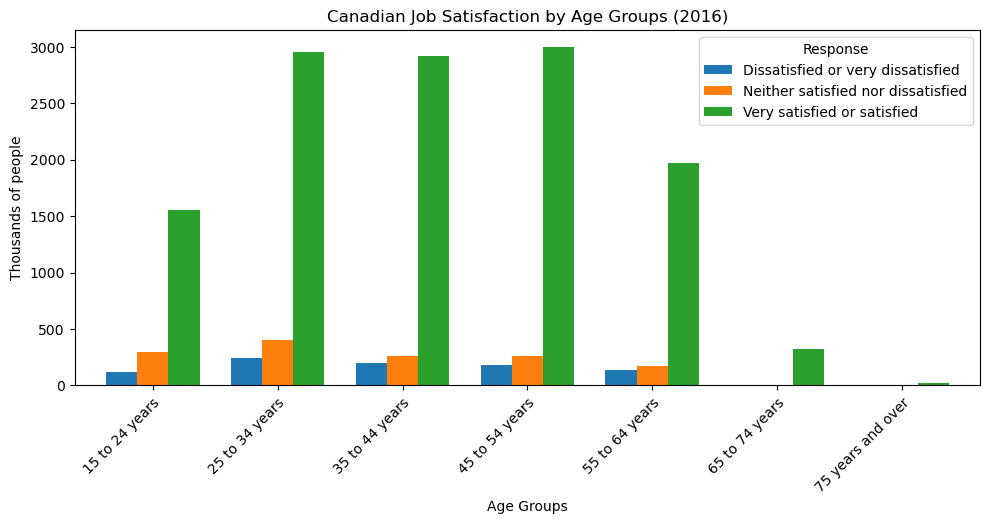

In [53]:
Age_ple_plot1 = new.pivot(index="Age group", columns="Response", 
                values="VALUE").plot(kind="bar", figsize=(10,5),title="Canadian Job Satisfaction by Age Groups (2016)",
                                     xlabel="Age Groups", ylabel="Thousands of people",
                                     width=0.75)
plt.xticks(rotation=45, wrap=True, ha="right")
plt.tight_layout()
plt.savefig("canada_project/results/age1.png")
plt.show()

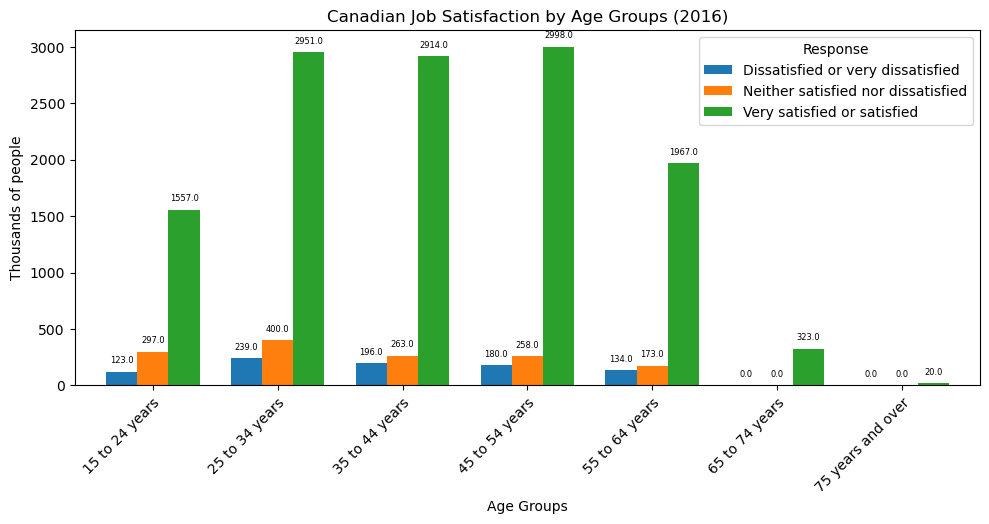

In [54]:
Age_ple_plot1 = new.pivot(index="Age group", columns="Response", 
                values="VALUE").plot(kind="bar", figsize=(10,5),title="Canadian Job Satisfaction by Age Groups (2016)",
                                     xlabel="Age Groups", ylabel="Thousands of people",
                                     width=0.75)

# Add number labels to the top of each bar
for container in Age_ple_plot1.containers:
    for bar in container:
        height = bar.get_height()
        Age_ple_plot1.annotate(f'{height:.1f}', (bar.get_x() + bar.get_width() / 2, height),
                               ha='center', va='bottom', xytext=(0, 5), textcoords='offset points',
                               fontsize=6)  # Adjust the fontsize as desired

plt.xticks(rotation=45, wrap=True, ha="right")
plt.tight_layout()
plt.savefig("canada_project/results/age2.png")
plt.show()

In [51]:
Female_Agegroup_persons = Canada_GEO[Canada_GEO["UOM"] == "Persons"]

female_new = Agegroup_persons[(Agegroup_persons["Sex"] == "Female") & 
                (Agegroup_persons["Response"] != "Total, job satisfaction") &
                (Agegroup_persons["Response"] != "Satisfied") &
                (Agegroup_persons["Response"] != "Very satisfied") &
                (Agegroup_persons["Response"] != "Don't know/refusal/not stated") &
                (Agegroup_persons["Response"] != "Dissatisfied") &
                (Agegroup_persons["Age group"] != "Total, 15 years and over") &
                (Agegroup_persons["Response"] != "Very dissatisfied") &
                (Agegroup_persons["Age group"] != "25 to 54 years") &
               (Agegroup_persons["Age group"] != "65 years and over")]
female_new

,GEO,Age group,Sex,Response,Estimates,UOM,SCALAR_FACTOR,VECTOR,VALUE,STATUS
COORDINATE,,,,,,,,,,
1.2.3.8.1,Canada,15 to 24 years,Female,Very satisfied or satisfied,Number of persons,Persons,thousands,v116747365,810.0,NaN
1.2.3.4.1,Canada,15 to 24 years,Female,Neither satisfied nor dissatisfied,Number of persons,Persons,thousands,v116319155,141.0,E
1.2.3.9.1,Canada,15 to 24 years,Female,Dissatisfied or very dissatisfied,Number of persons,Persons,thousands,v116747369,53.0,E
1.6.3.8.1,Canada,25 to 34 years,Female,Very satisfied or satisfied,Number of persons,Persons,thousands,v116747557,1420.0,NaN
1.6.3.4.1,Canada,25 to 34 years,Female,Neither satisfied nor dissatisfied,Number of persons,Persons,thousands,v116747569,151.0,NaN
1.6.3.9.1,Canada,25 to 34 years,Female,Dissatisfied or very dissatisfied,Number of persons,Persons,thousands,v116747573,120.0,E
1.3.3.8.1,Canada,35 to 44 years,Female,Very satisfied or satisfied,Number of persons,Persons,thousands,v116747605,1403.0,NaN
1.3.3.4.1,Canada,35 to 44 years,Female,Neither satisfied nor dissatisfied,Number of persons,Persons,thousands,v116319239,135.0,NaN
1.3.3.9.1,Canada,35 to 44 years,Female,Dissatisfied or very dissatisfied,Number of persons,Persons,thousands,v116747609,82.0,NaN


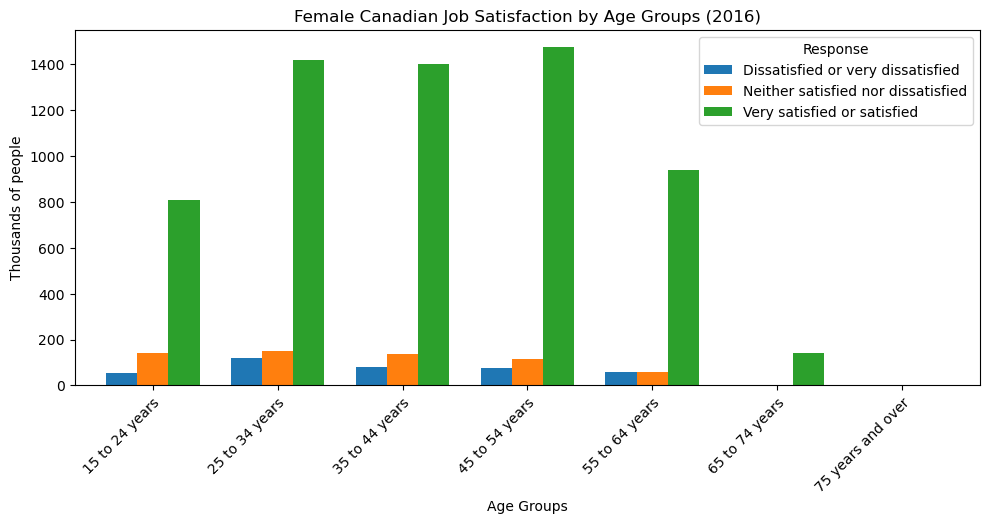

In [55]:
Female_Age_plot1 = female_new.pivot(index="Age group", columns="Response", 
                values="VALUE").plot(kind="bar", figsize=(10,5),title="Female Canadian Job Satisfaction by Age Groups (2016)",
                                     xlabel="Age Groups", ylabel="Thousands of people",
                                     width=0.75)

plt.xticks(rotation=45, wrap=True, ha="right")
plt.tight_layout()
plt.savefig("canada_project/results/age_female1.png")
plt.show()

In [56]:
male_Agegroup_persons = Canada_GEO[Canada_GEO["UOM"] == "Persons"]

male_new = Agegroup_persons[(Agegroup_persons["Sex"] == "Male") & 
                (Agegroup_persons["Response"] != "Total, job satisfaction") &
                (Agegroup_persons["Response"] != "Satisfied") &
                (Agegroup_persons["Response"] != "Very satisfied") &
                (Agegroup_persons["Response"] != "Don't know/refusal/not stated") &
                (Agegroup_persons["Response"] != "Dissatisfied") &
                (Agegroup_persons["Age group"] != "Total, 15 years and over") &
                (Agegroup_persons["Response"] != "Very dissatisfied") &
                (Agegroup_persons["Age group"] != "25 to 54 years") &
               (Agegroup_persons["Age group"] != "65 years and over")]

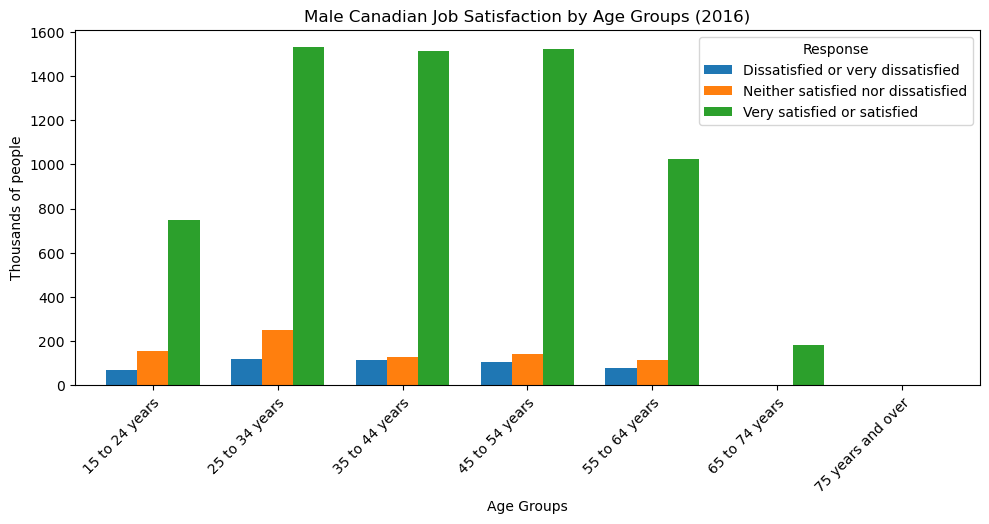

In [57]:
male_Age_plot1 = male_new.pivot(index="Age group", columns="Response", 
                values="VALUE").plot(kind="bar", figsize=(10,5),title="Male Canadian Job Satisfaction by Age Groups (2016)",
                                     xlabel="Age Groups", ylabel="Thousands of people",
                                     width=0.75)

# Add number labels to the top of each bar
for container in Age_ple_plot1.containers:
    for bar in container:
        height = bar.get_height()
        Age_ple_plot1.annotate(f'{height:.1f}', (bar.get_x() + bar.get_width() / 2, height),
                               ha='center', va='bottom', xytext=(0, 5), textcoords='offset points',
                               fontsize=6)  # Adjust the fontsize as desired

plt.xticks(rotation=45, wrap=True, ha="right")
plt.tight_layout()
plt.savefig("canada_project/results/age_male1.png")
plt.show()

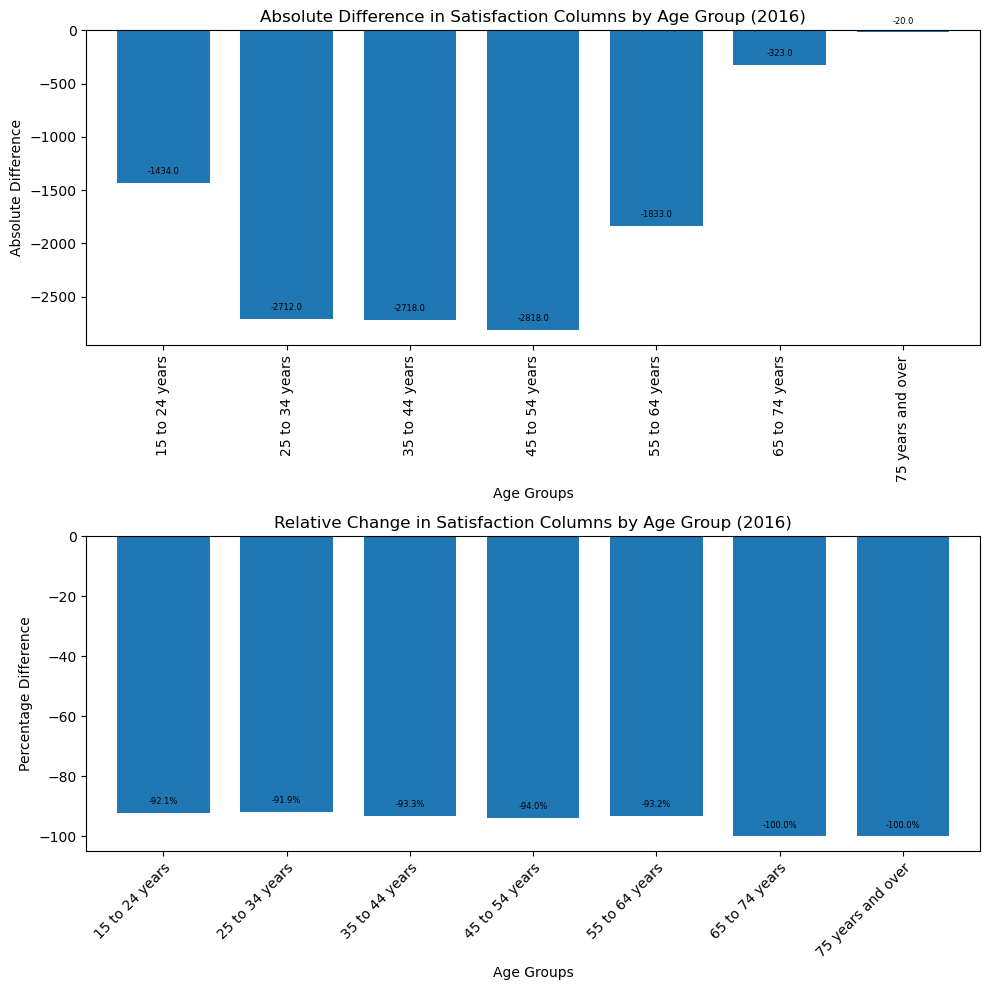

In [58]:
# Group the DataFrame by 'Age group' and 'Response' and calculate the mean of 'VALUE'
grouped = new.groupby(['Age group', 'Response'])['VALUE'].mean().unstack()

# Calculate the absolute difference between 'Dissatisfied or very dissatisfied' and 'Very satisfied or satisfied'
grouped['Absolute Difference'] = grouped['Dissatisfied or very dissatisfied'] - grouped['Very satisfied or satisfied']

# Calculate the percentage difference between 'Dissatisfied or very dissatisfied' and 'Very satisfied or satisfied'
grouped['Percentage Difference'] = ((grouped['Dissatisfied or very dissatisfied'] - grouped['Very satisfied or satisfied'])
                                    / grouped['Very satisfied or satisfied']) * 100

# Create the bar chart for absolute difference
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
grouped['Absolute Difference'].plot(kind='bar', ax=axes[0],
                                   title='Absolute Difference in Satisfaction Columns by Age Group (2016)',
                                   xlabel='Age Groups',
                                   ylabel='Absolute Difference',
                                   width=0.75)

# Create the bar chart for percentage difference
grouped['Percentage Difference'].plot(kind='bar', ax=axes[1],
                                      title='Relative Change in Satisfaction Columns by Age Group (2016)',
                                      xlabel='Age Groups',
                                      ylabel='Percentage Difference',
                                      width=0.75)

# Add number labels to the top of each bar for absolute difference
for container in axes[0].containers:
    for bar in container:
        height = bar.get_height()
        axes[0].annotate(f'{height:.1f}', (bar.get_x() + bar.get_width() / 2, height),
                         ha='center', va='bottom', xytext=(0, 5), textcoords='offset points',
                         fontsize=6)  # Adjust the fontsize as desired

# Add number labels to the top of each bar for percentage difference
for container in axes[1].containers:
    for bar in container:
        height = bar.get_height()
        axes[1].annotate(f'{height:.1f}%', (bar.get_x() + bar.get_width() / 2, height),
                         ha='center', va='bottom', xytext=(0, 5), textcoords='offset points',
                         fontsize=6)  # Adjust the fontsize as desired

plt.xticks(rotation=45, wrap=True, ha='right')
plt.tight_layout()
plt.savefig("canada_project/results/age_diff.png")
plt.show()